In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

import prepare
import explore

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# utilized for creating models and visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# utilized for metrics on my models
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hr_attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df = prepare.clean_hr(df)

In [6]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,1,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,0,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,0,2,2,0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,0,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,0,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2


In [7]:
num_list, cat_list = explore.dtypes_to_list(df)

In [8]:
for col in cat_list:
    print(col)
    print(df[col].value_counts(sort=True))
    print()

attrition
No     1233
Yes     237
Name: attrition, dtype: int64

businesstravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: businesstravel, dtype: int64

department
0    961
1    446
2     63
Name: department, dtype: int64

educationfield
1    606
2    464
3    159
4    132
0     82
5     27
Name: educationfield, dtype: int64

gender
Male      882
Female    588
Name: gender, dtype: int64

jobrole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: jobrole, dtype: int64

maritalstatus
2    673
1    470
0    327
Name: maritalstatus, dtype: int64

numcompaniesworked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: numcompaniesworked, dtype: int64

overtime


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   int64 
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   int64 
 8   employeenumber            1470 non-null   int64 
 9   environmentsatisfaction   1470 non-null   int64 
 10  gender                    1470 non-null   object
 11  hourlyrate                1470 non-null   int64 
 12  jobinvolvement            1470 non-null   int64 
 13  joblevel                  1470 non-null   int64 
 14  jobrole                 

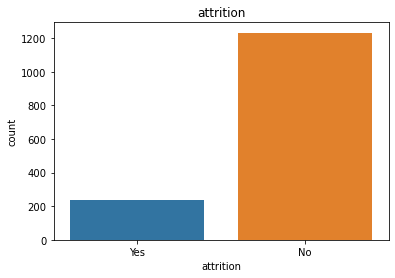

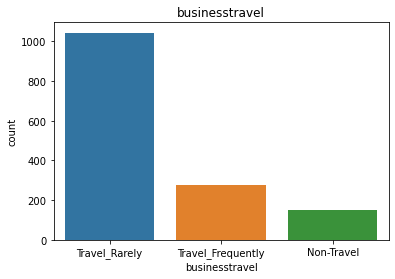

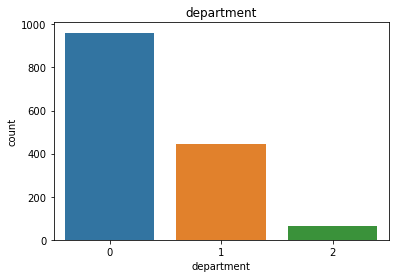

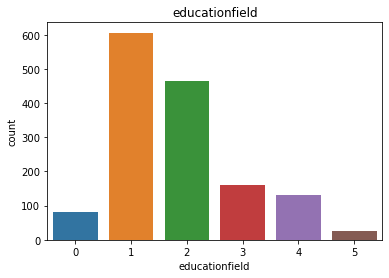

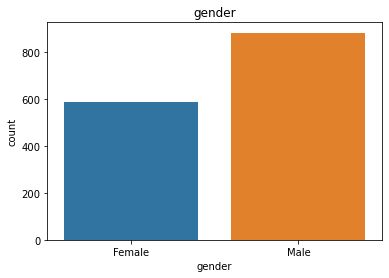

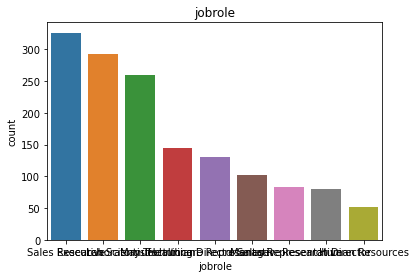

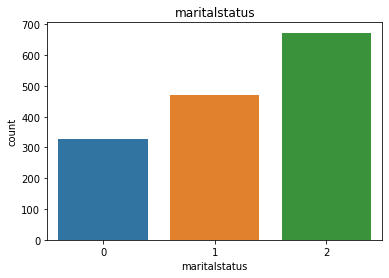

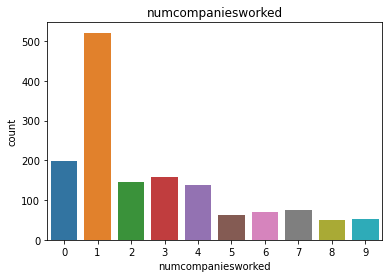

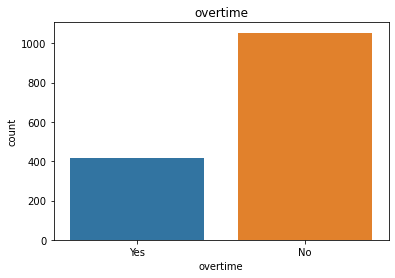

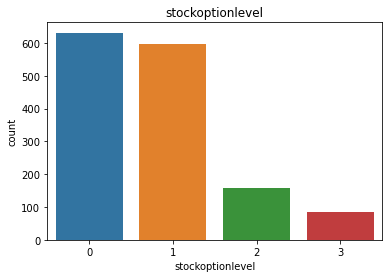

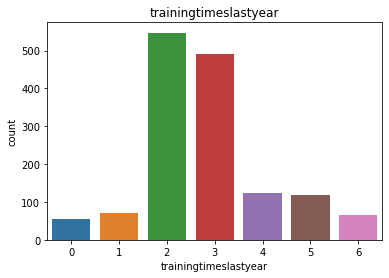

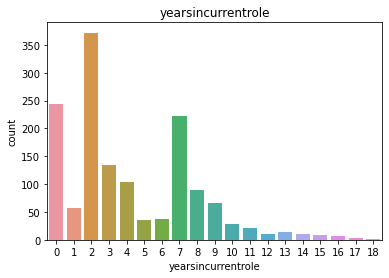

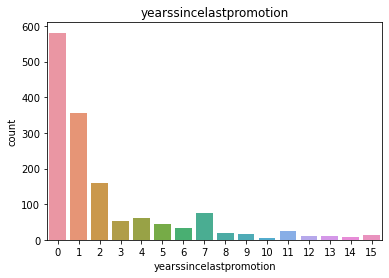

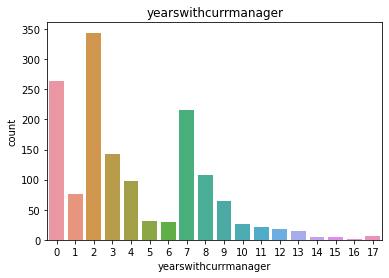

In [10]:
for col in cat_list:
    sns.countplot(data=df, x= col)
    plt.title(col)
    plt.show()

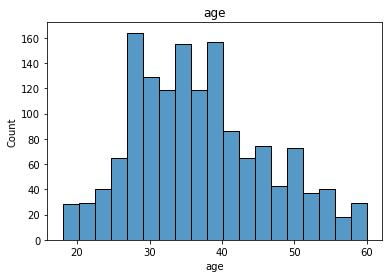

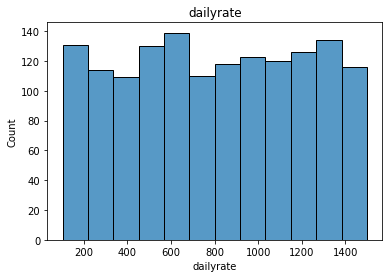

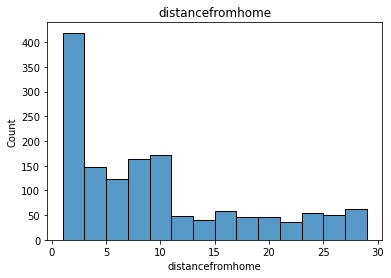

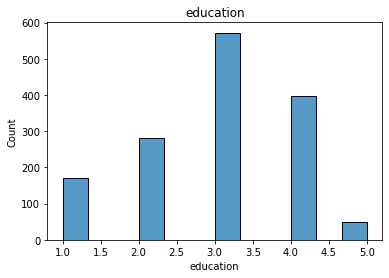

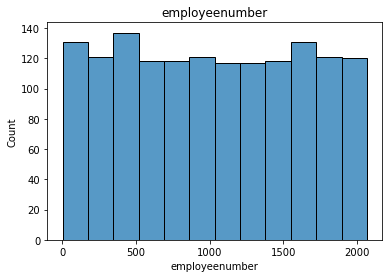

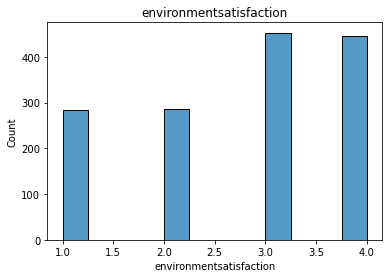

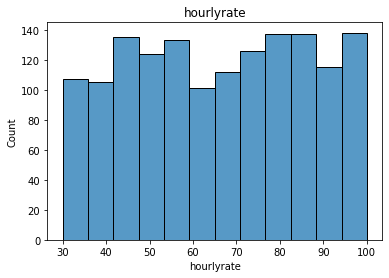

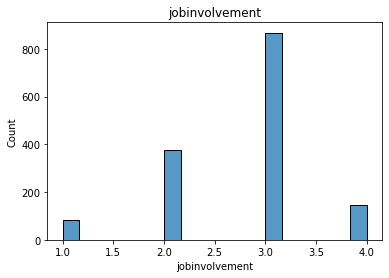

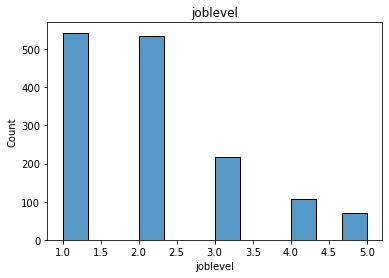

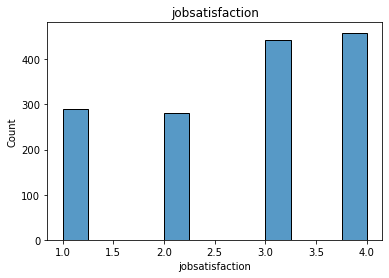

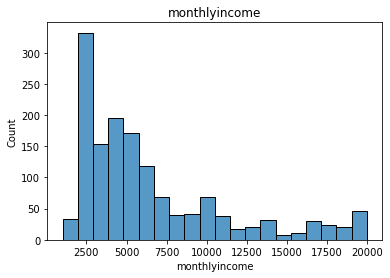

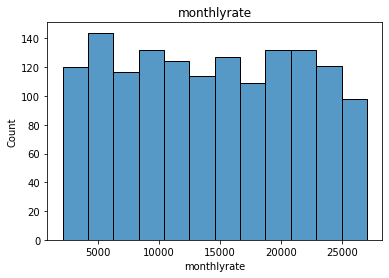

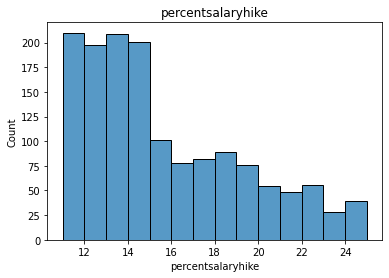

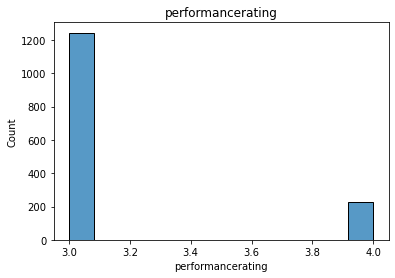

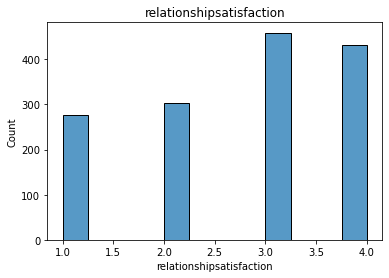

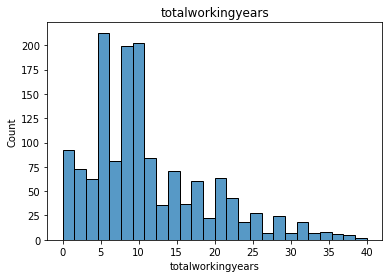

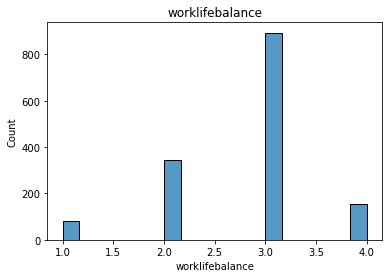

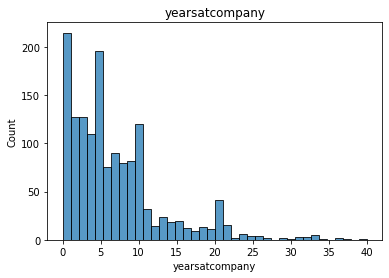

In [11]:
for col in num_list:
    sns.histplot(data=df, x=col)
    plt.title(col)
    plt.show()

# Explore

# What should my target variable be?

- I feel as though attrition should be my target variable because it would be important to the company to predict when and why employees are leaving their place of business.

- Questions to be asked:

> Does personal features such as performance rating, number of companies worked, age, marital status, etc have a large influence on attrition?
>
> Does company involvement such as pay, manager rotation, environment, etc have a large influence on attrition?
>
> Which employees with specific educational backgrounds leave and which ones stay?
>
> Which job roles are more prone to have high turnover? Which ones incur high tenure? 
>
> What is the attrition rate of eople who have most of their work experience at the company?

---------------------------------------------------------------

# Goals and Deliverables

- My goal is to create the best model for predicting the attrition rate of employees at this company.

- I am to deliver a working model along with an entire notebook outlining how I came to my conclusion and end product.

------

# Initial Thoughts and Hypotheses

> My thought process going into this project is that the individauls who have a weaker incentive to stay monetarily are the ones who incur higher turnover.

# Explore

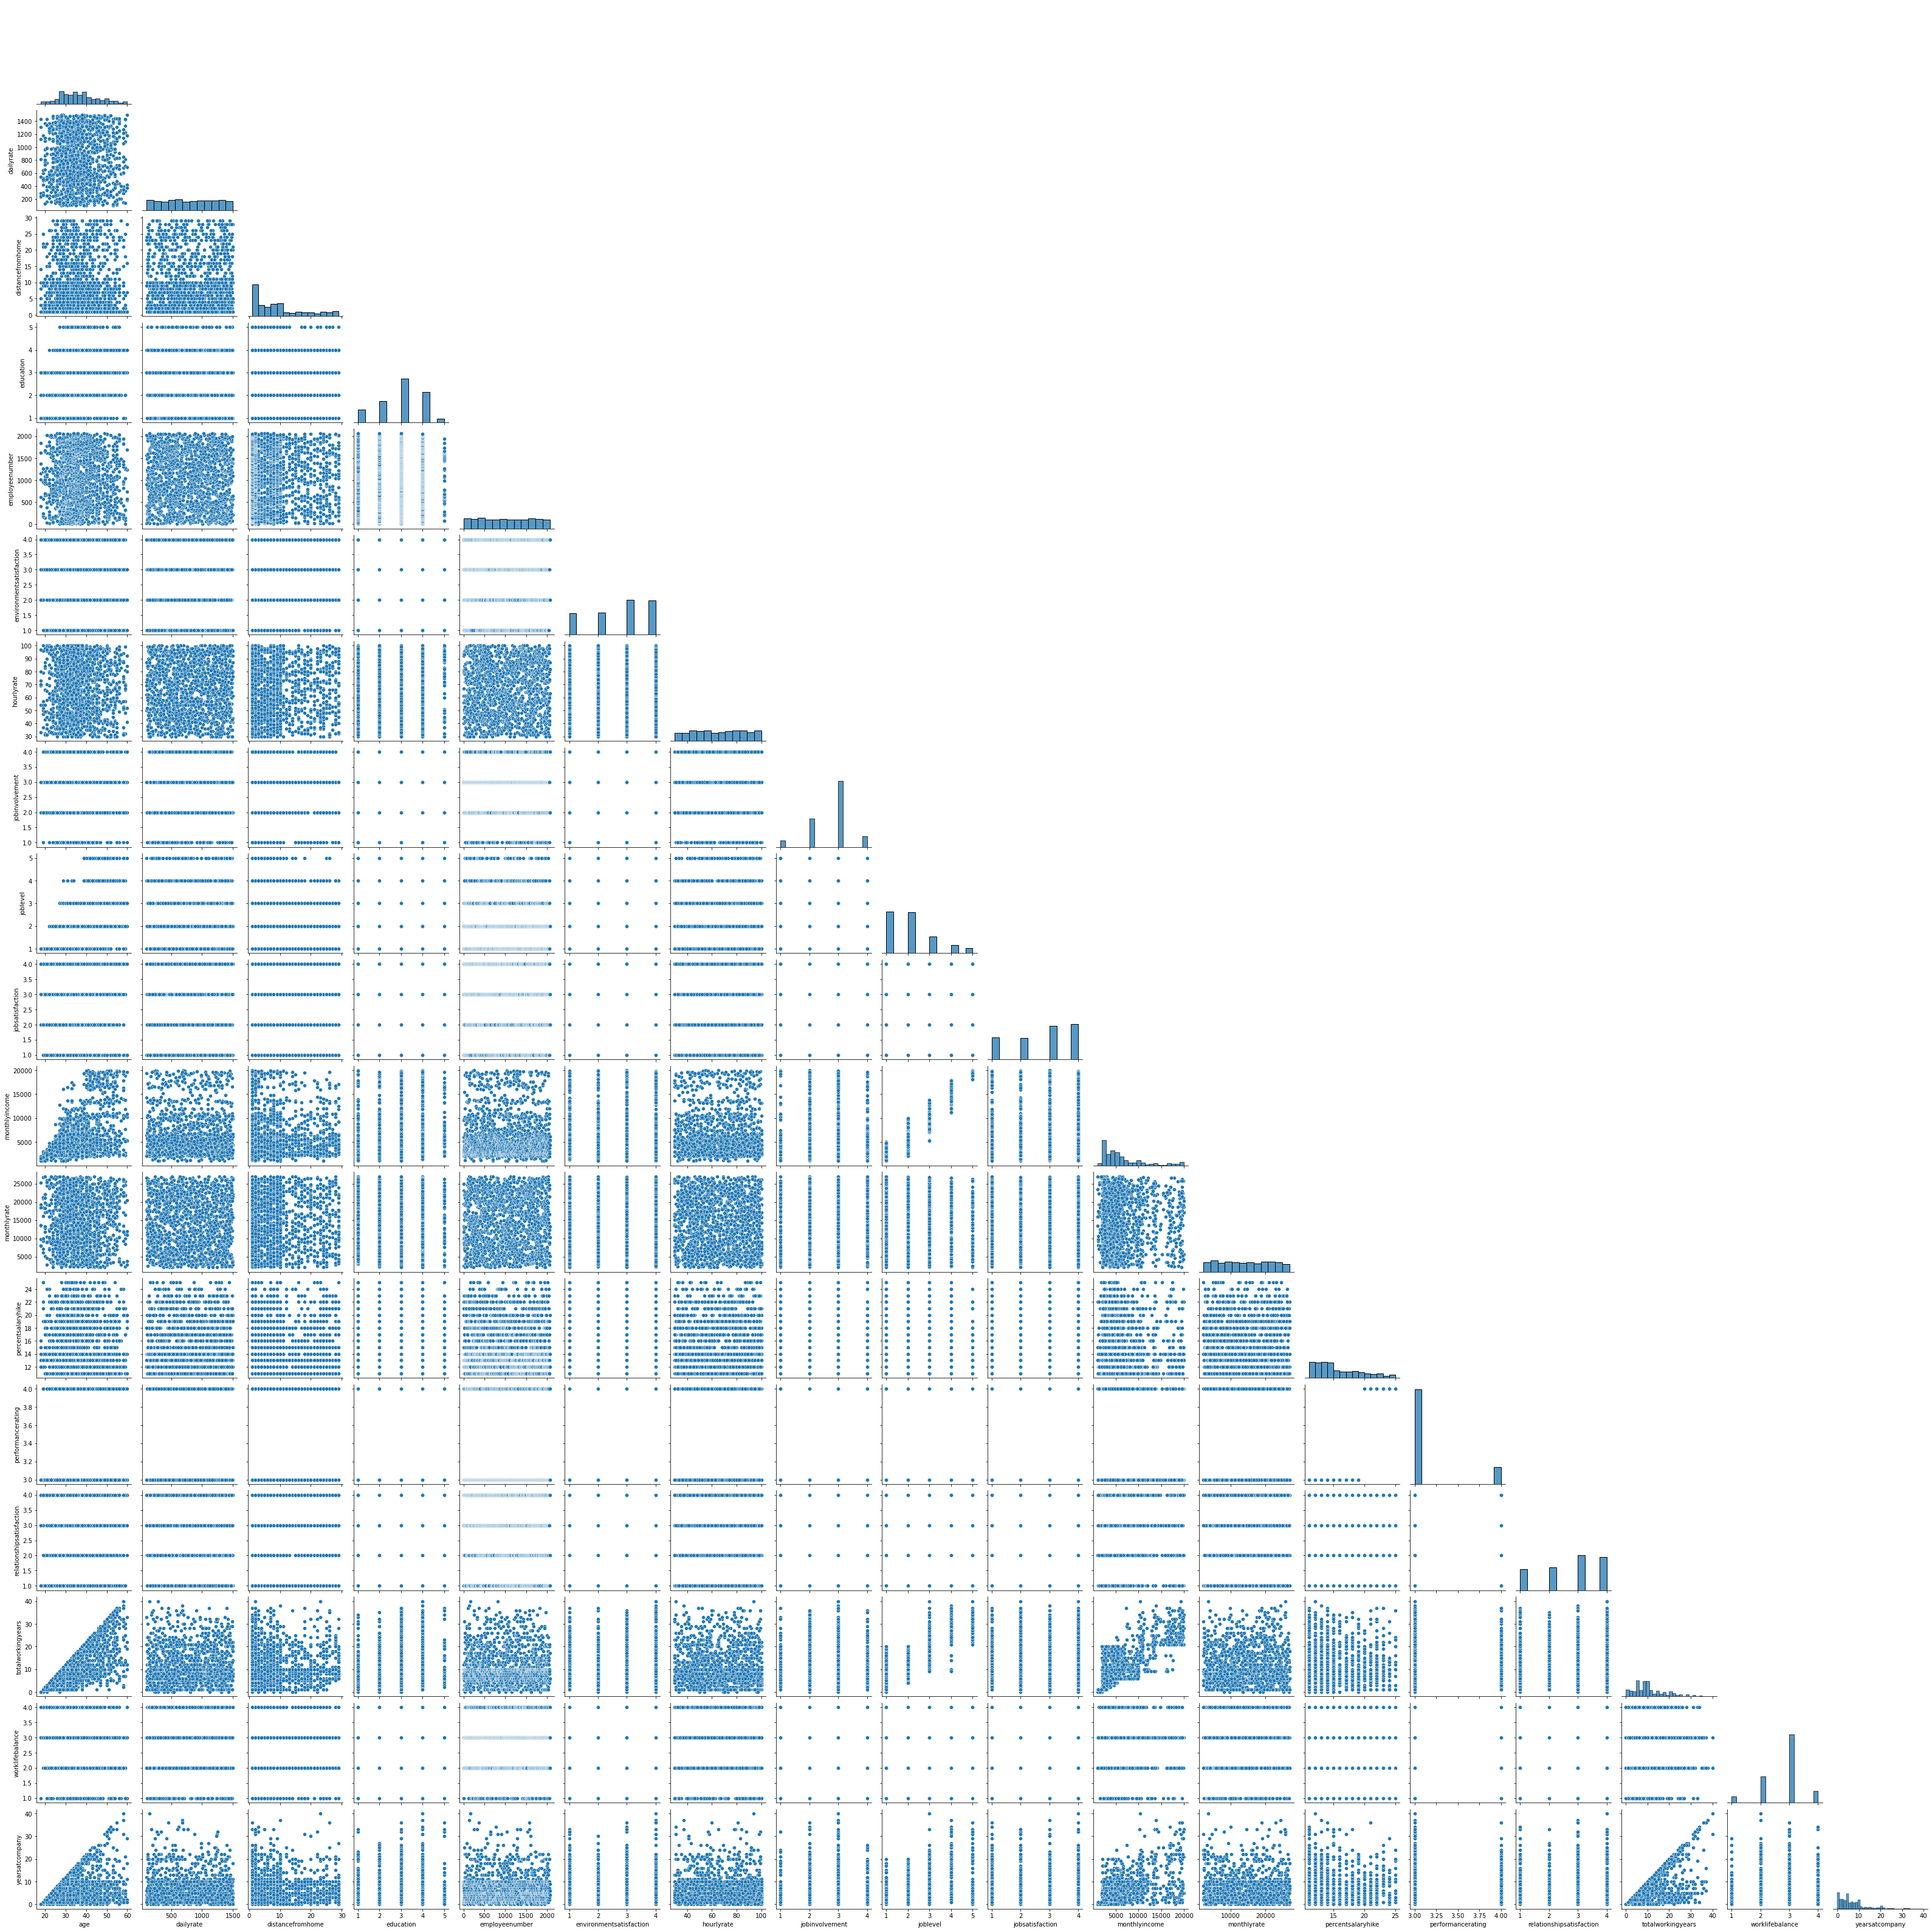

In [12]:
sns.pairplot(data = df[num_list], corner=True)

<AxesSubplot:>

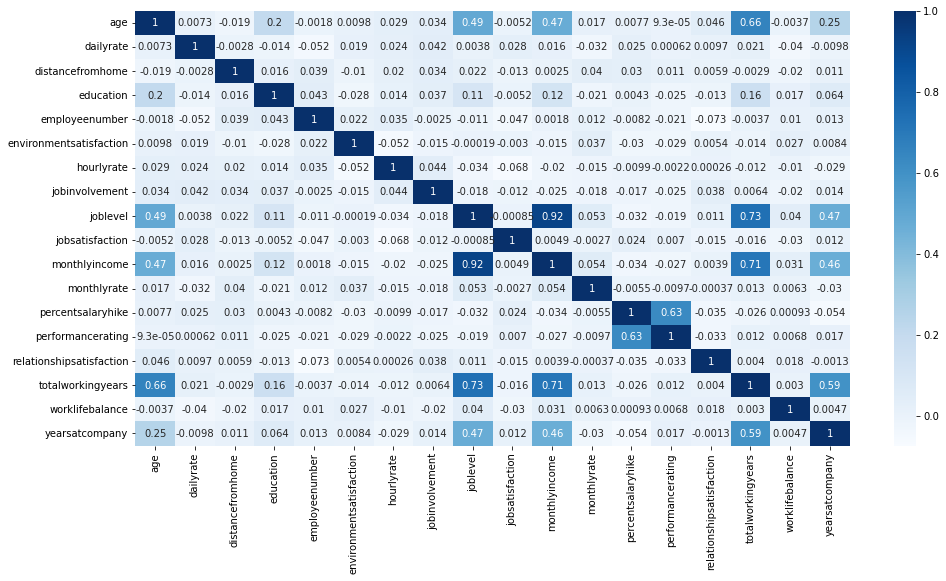

In [13]:
hr_corr = df[num_list].corr(method='spearman')

plt.figure(figsize=(16,8))
sns.heatmap(hr_corr, cmap='Blues', annot=True)

### At first look we can see a decent correlation between total working years and age, total working years and job level, total working years and monthly income, performance rating and percent salary hike, and the highest correlation aligns with monthly income and job level.

In [14]:
train, validate, test = prepare.my_train_test_split(df, 'attrition')

In [15]:
train.shape, validate.shape, test.shape

((882, 32), (294, 32), (294, 32))

## Let's look at the relationship between some of the features and attrition

## Does the monetary features have a strong relationship with attrition?

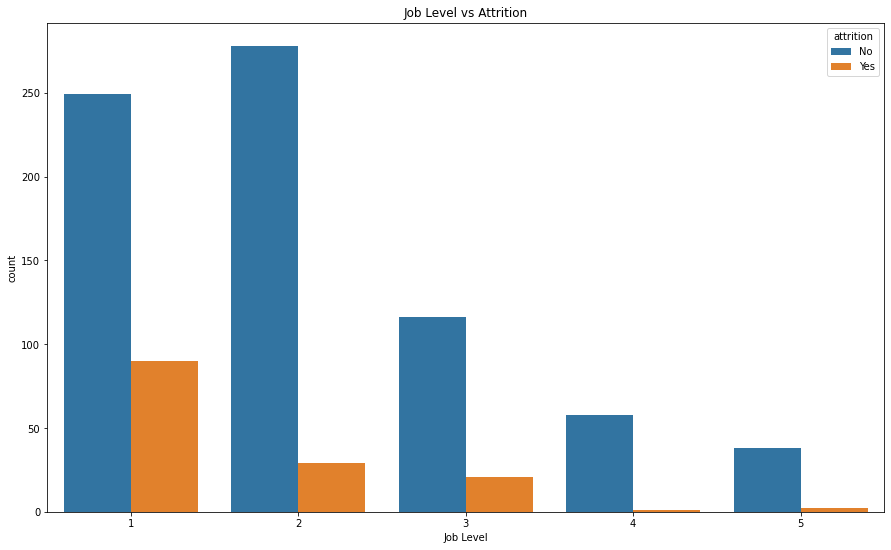

In [16]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.joblevel, hue = 'attrition', data = train)
plt.title('Job Level vs Attrition')
plt.xlabel('Job Level')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

In [17]:
observed = pd.crosstab(train.joblevel, train.attrition)
observed

attrition,No,Yes
joblevel,,
1,249,90
2,278,29
3,116,21
4,58,1
5,38,2


In [18]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 49.9418
p     = 0.0000


In [19]:
if p < 0.05:
    print('We reject the null hypothesis that job level is independent of attrition rate')
else:
    print("we fail to reject the null hypothesis that job level is independent of attrition rate")

We reject the null hypothesis that job level is independent of attrition rate


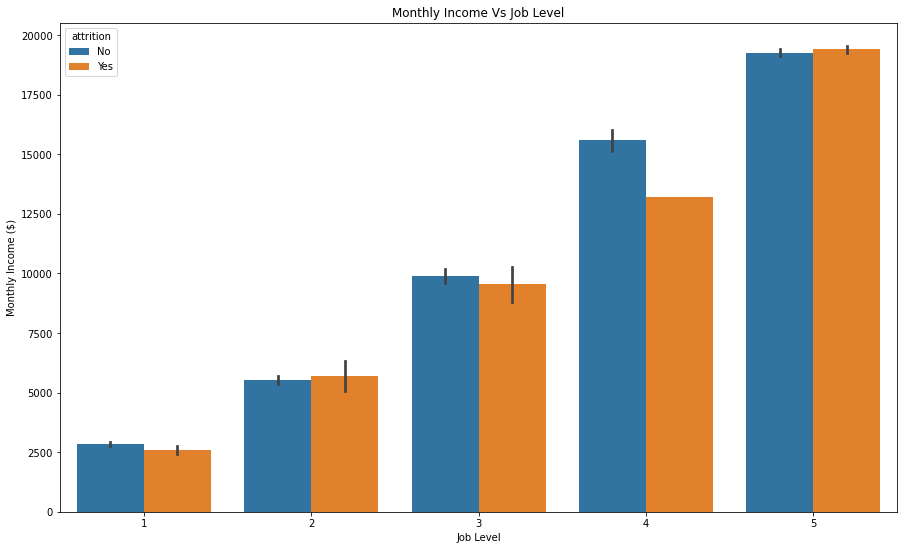

In [20]:
plt.figure(figsize =(15, 9))
sns.barplot(x = train.joblevel, y=train.monthlyincome, hue= 'attrition', data = train)
plt.title('Monthly Income Vs Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income ($)')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

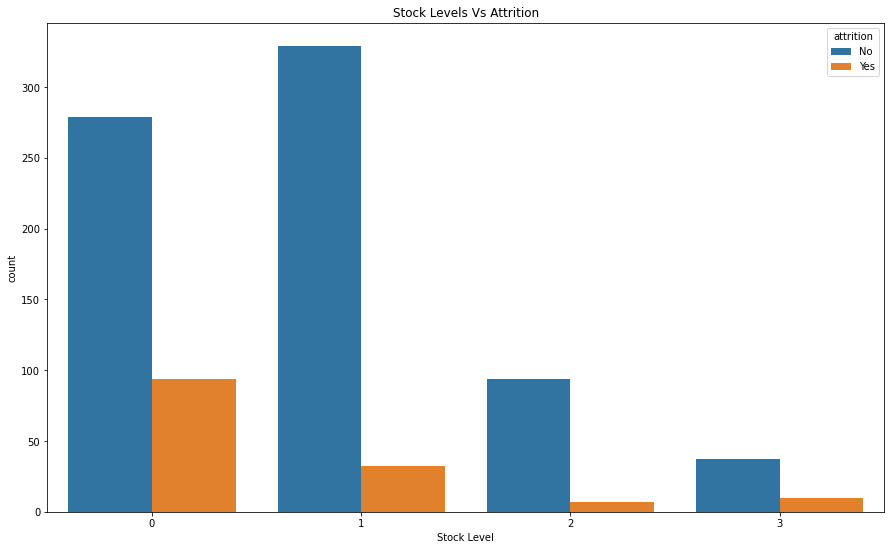

In [21]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.stockoptionlevel, hue= 'attrition', data = train)
plt.title('Stock Levels Vs Attrition')
plt.xlabel('Stock Level')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

In [22]:
observed = pd.crosstab(train.stockoptionlevel, train.attrition)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print()

if p < 0.05:
    print('We reject the null hypothesis that stock option level is independent of attrition rate')
else:
    print("we fail to reject the null hypothesis that stock option level is independent of attrition rate")

chi^2 = 43.8263
p     = 0.0000

We reject the null hypothesis that stock option level is independent of attrition rate


## Employees making the least amount of money (junior positions) are more prone to leaving the company

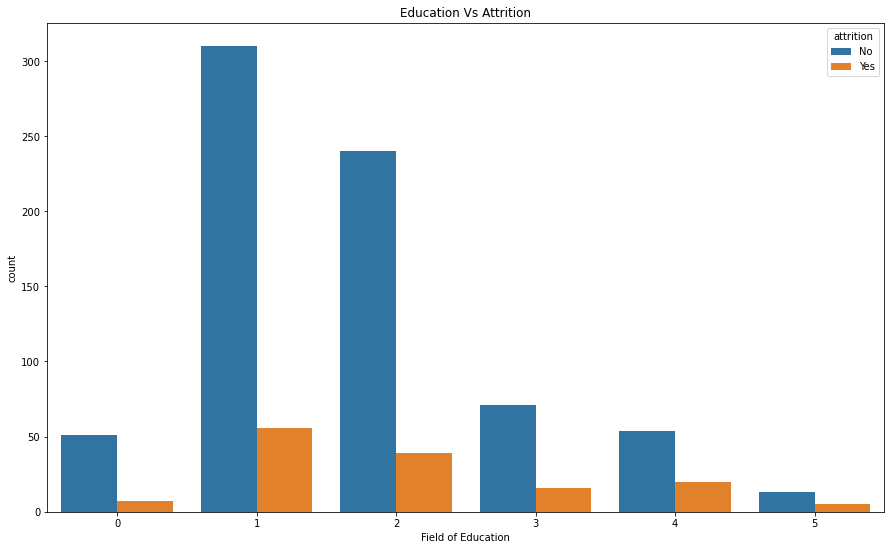

In [23]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.educationfield, hue= 'attrition', data = train)
plt.title('Education Vs Attrition')
plt.xlabel('Field of Education')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

In [24]:
observed = pd.crosstab(train.educationfield, train.attrition)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print()

if p < 0.05:
    print('We reject the null hypothesis that educational background is independent of attrition rate')
else:
    print("we fail to reject the null hypothesis that educational background is independent of attrition rate")

chi^2 = 10.4293
p     = 0.0639

we fail to reject the null hypothesis that educational background is independent of attrition rate


# Employees with a Life Sciences or Medical degree are more prone to leave, but also seem to make up the larger majority of the company

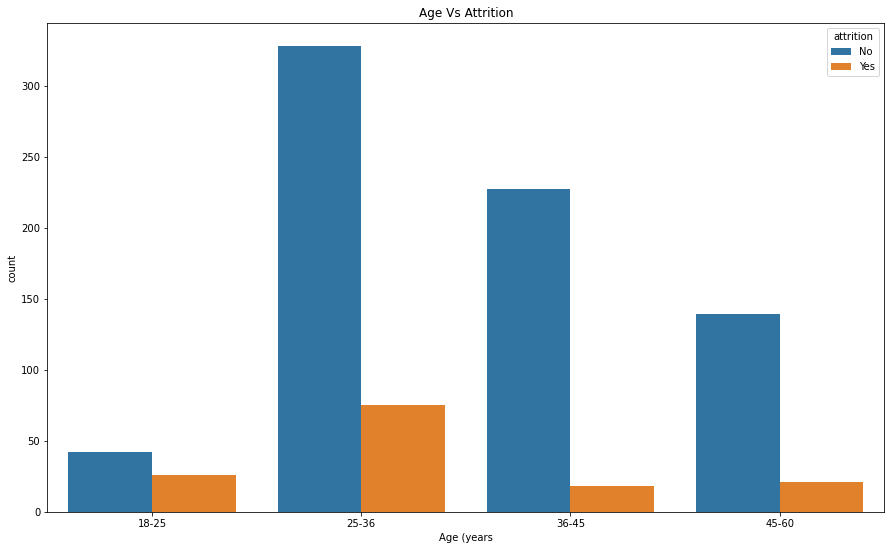

In [25]:
plt.figure(figsize =(15, 9))
sns.countplot(x = pd.cut(train.age, bins=[18, 25, 36, 45, 60], labels=['18-25','25-36','36-45','45-60']), hue= 'attrition', data = train)
plt.title('Age Vs Attrition')
plt.xlabel('Age (years')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

### Those within the 25-36 age range are morst prone to leave

In [26]:
observed = pd.crosstab(train.age, train.attrition)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print()

if p < 0.05:
    print('We reject the null hypothesis that age is independent of attrition rate')
else:
    print("we fail to reject the null hypothesis that age is independent of attrition rate")

chi^2 = 97.9653
p     = 0.0000

We reject the null hypothesis that age is independent of attrition rate


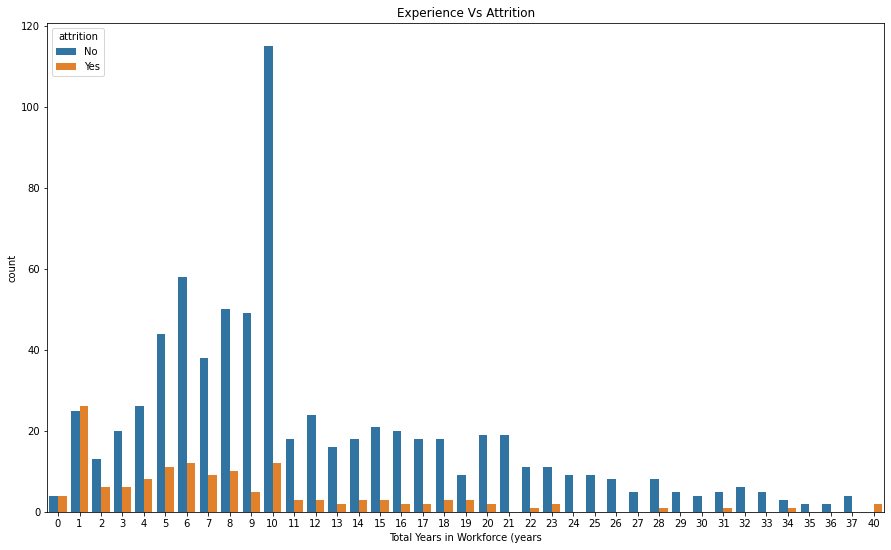

In [27]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.totalworkingyears, hue= 'attrition', data = train)
plt.title('Experience Vs Attrition')
plt.xlabel('Total Years in Workforce (years')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

## Employees within their first year of working are more prone to leave the company vs anyone else, with 2-10 years being the next target group.  Individuals at the beginning of their careers.

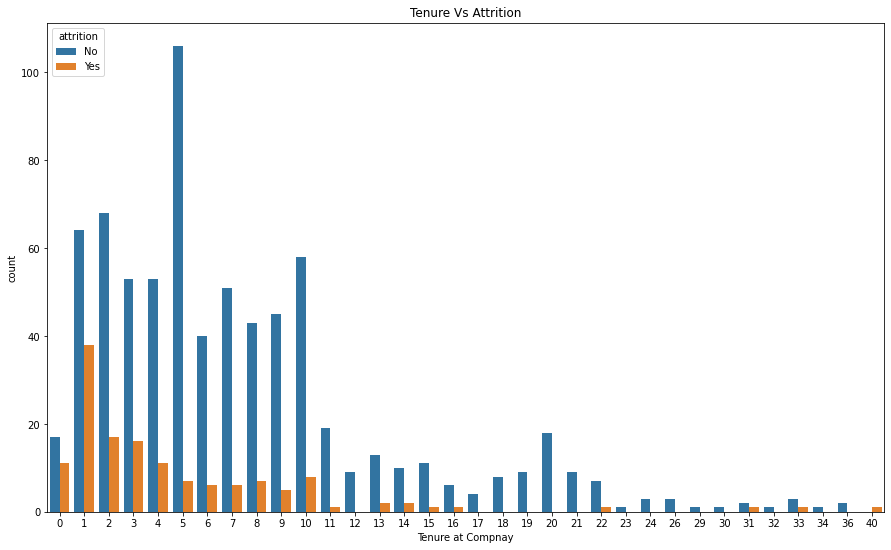

In [28]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.yearsatcompany, hue= 'attrition', data = train)
plt.title('Tenure Vs Attrition')
plt.xlabel('Tenure at Compnay')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

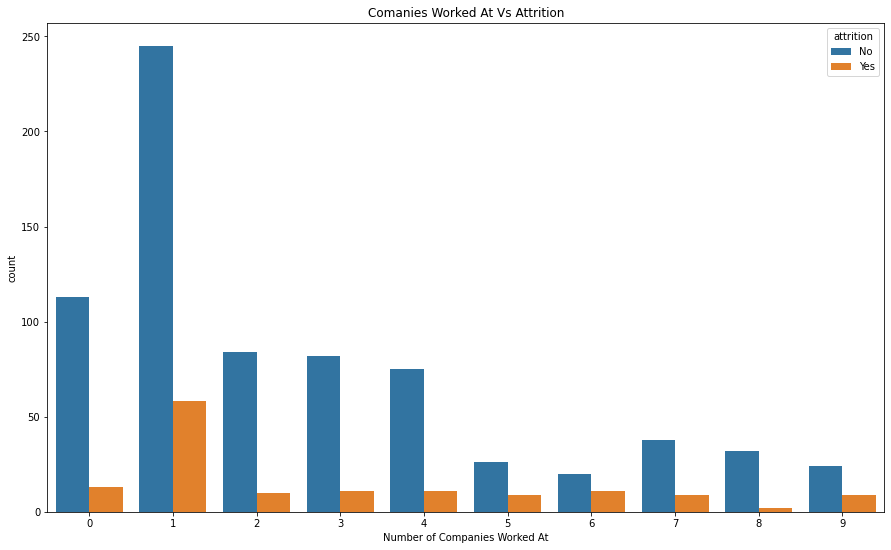

In [29]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.numcompaniesworked, hue= 'attrition', data = train)
plt.title('Comanies Worked At Vs Attrition')
plt.xlabel('Number of Companies Worked At')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

In [30]:
observed = pd.crosstab(train.numcompaniesworked, train.attrition)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print()

if p < 0.05:
    print('We reject the null hypothesis that the number of companies an employee has worked at is independent of attrition rate')
else:
    print("we fail to reject the null hypothesis that the number of companies an employee has worked at is independent of attrition rate")

chi^2 = 26.0868
p     = 0.0020

We reject the null hypothesis that the number of companies an employee has worked at is independent of attrition rate


## It seems as though employees who's first jobs are at this company are the ones who leave most often since the numbers seem to match the total workforce experience numbers

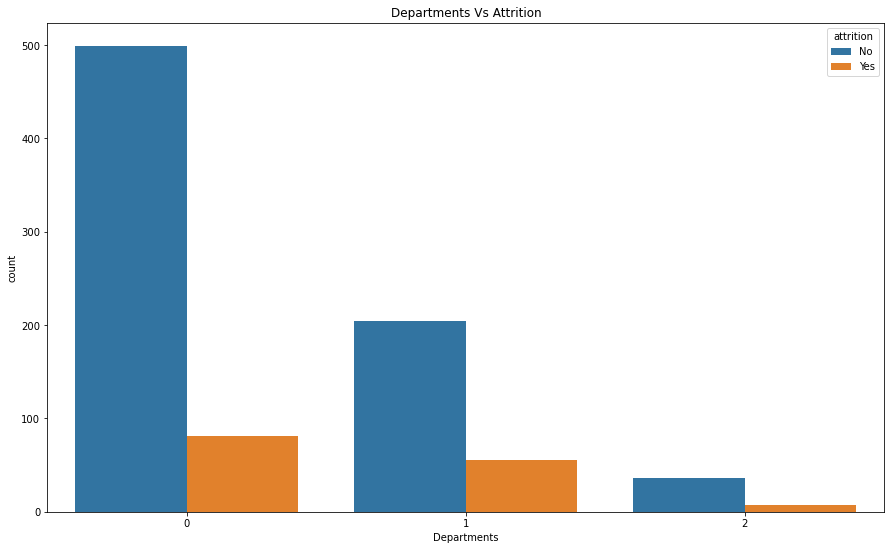

In [31]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.department, hue= 'attrition', data = train)
plt.title('Departments Vs Attrition')
plt.xlabel('Departments')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

In [32]:
observed = pd.crosstab(train.department, train.attrition)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print()

if p < 0.05:
    print('We reject the null hypothesis that deparments are independent of attrition rate')
else:
    print("we fail to reject the null hypothesis that departments are independent of attrition rate")

chi^2 = 6.9663
p     = 0.0307

We reject the null hypothesis that deparments are independent of attrition rate


## R&D and Sales Have the highest rate of attrition, but Sales has the highest ratio of turnover

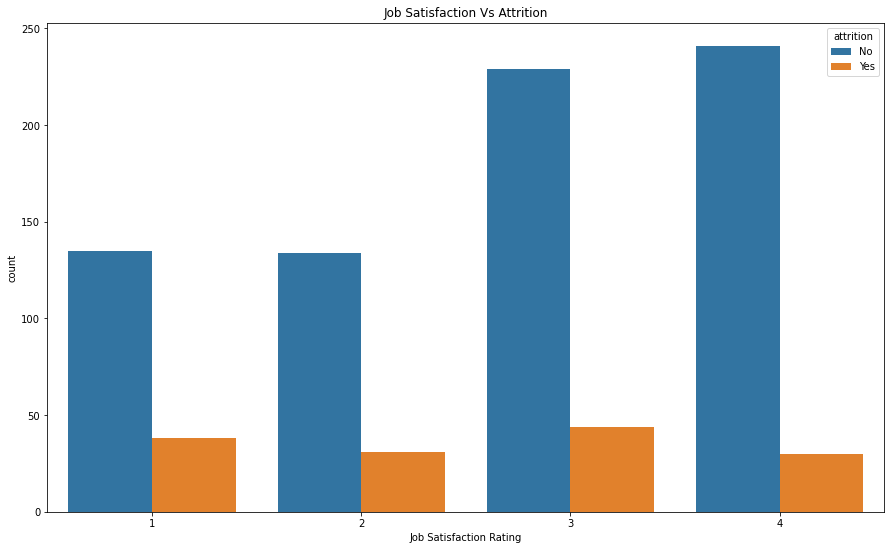

In [33]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.jobsatisfaction, hue= 'attrition', data = train)
plt.title('Job Satisfaction Vs Attrition')
plt.xlabel('Job Satisfaction Rating')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

## There isn't much difference between different job satisfaction rating in terms of Attrition.

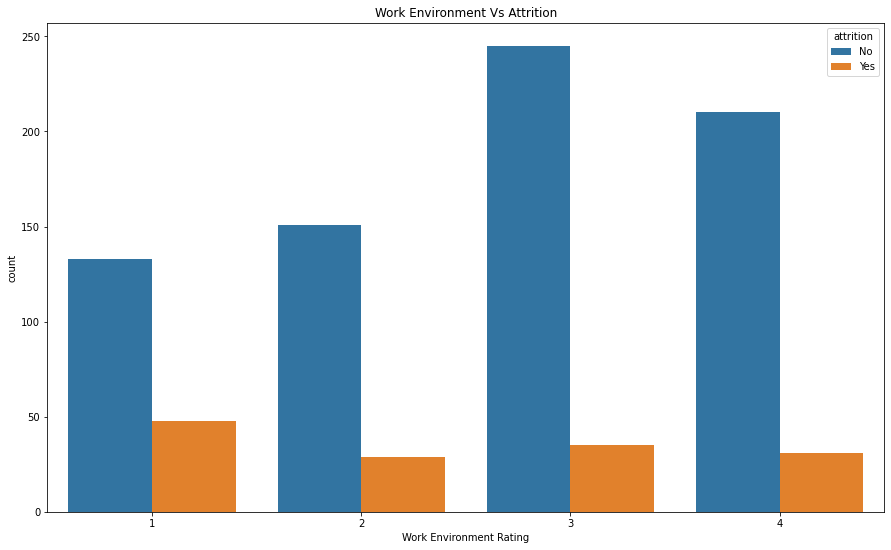

In [34]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.environmentsatisfaction, hue= 'attrition', data = train)
plt.title('Work Environment Vs Attrition')
plt.xlabel('Work Environment Rating')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

In [35]:
observed = pd.crosstab(train.environmentsatisfaction, train.attrition)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print()

if p < 0.05:
    print("We reject the null hypothesis that an employee's work environment are independent of attrition rate")
else:
    print("we fail to reject the null hypothesis that an employee's work environment are are independent of attrition rate")

chi^2 = 18.9867
p     = 0.0003

We reject the null hypothesis that an employee's work environment are independent of attrition rate


## Work environment rating is miniscule as well, but it seems like those with the lowest rating leave the company more often than other ratings.

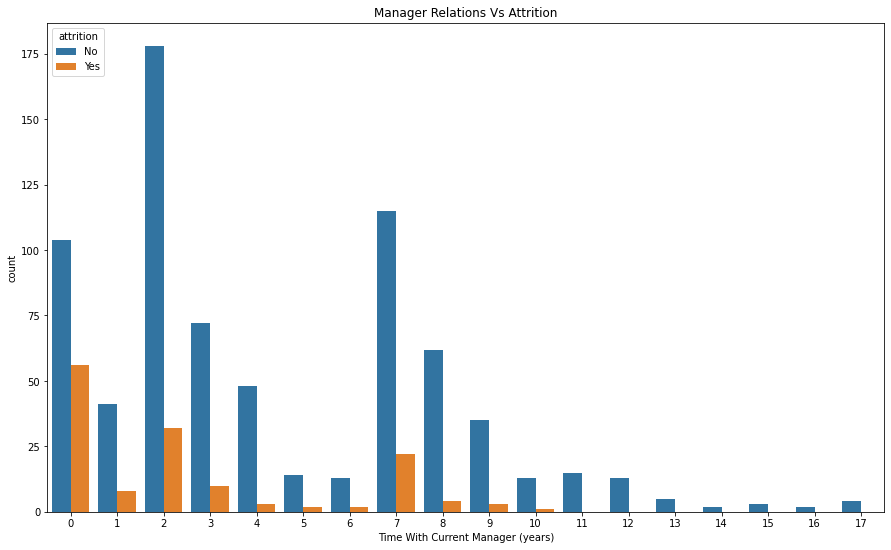

In [36]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.yearswithcurrmanager, hue= 'attrition', data = train)
plt.title('Manager Relations Vs Attrition')
plt.xlabel('Time With Current Manager (years)')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

## Employees with less than 3 years with their current manager tend to leave the company more often which could be a result of those early in their career maybe leaving for other reasons or it could be that they didn't have great supervision.

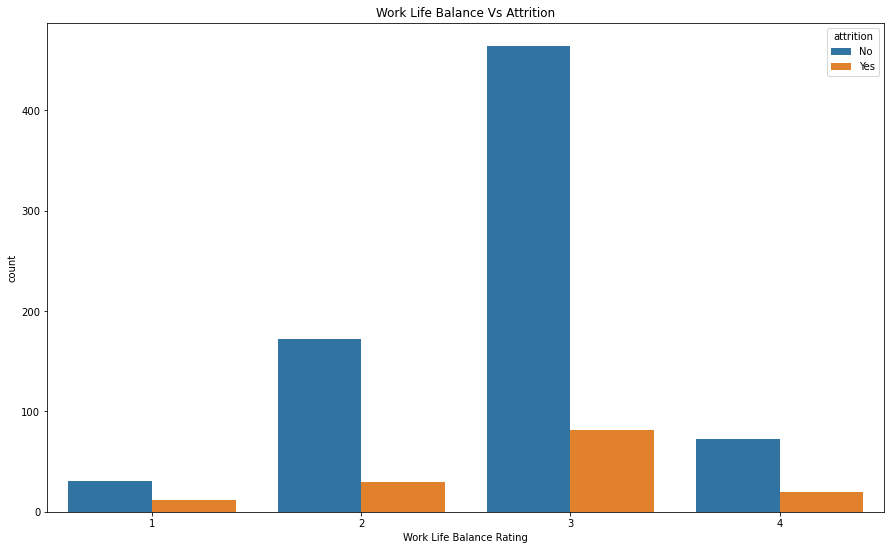

In [37]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.worklifebalance, hue= 'attrition', data = train)
plt.title('Work Life Balance Vs Attrition')
plt.xlabel('Work Life Balance Rating')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

## Thinking that work life balance would make a difference in why an employee would leave a company, it turns out that even with a higher rating more employees were leaving the company with a 3 so work life balance may not be an influencer.

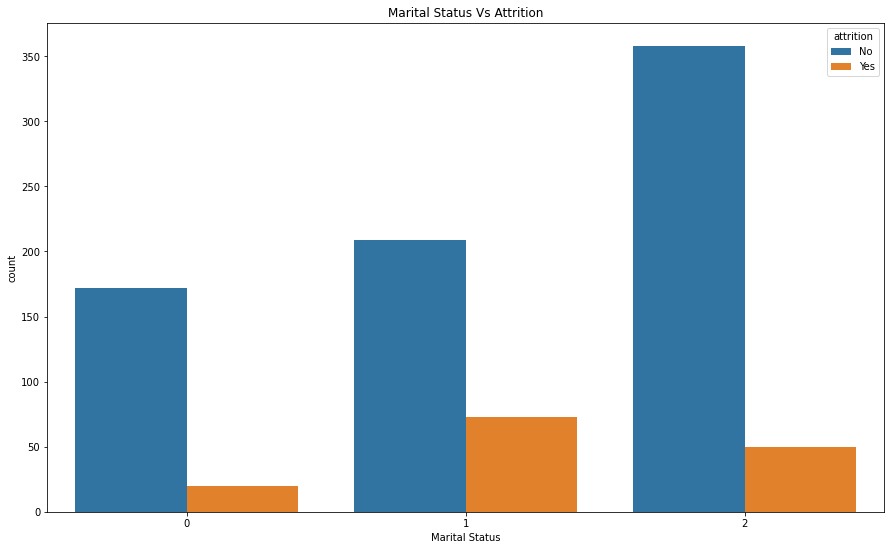

In [38]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.maritalstatus, hue= 'attrition', data = train)
plt.title('Marital Status Vs Attrition')
plt.xlabel('Marital Status')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

## More employees who were never married tend to leave the company more often than those who are married or have been divorced.

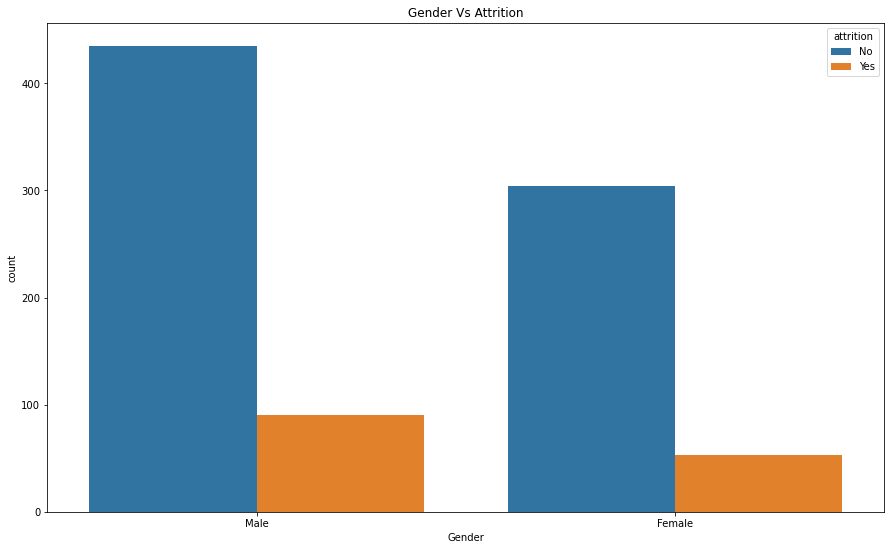

In [39]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.gender, hue= 'attrition', data = train)
plt.title('Gender Vs Attrition')
plt.xlabel('Gender')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

## More men leave the company than females but it is a small difference due to the ratios being different so they actually seem to leave the company at a similar rate

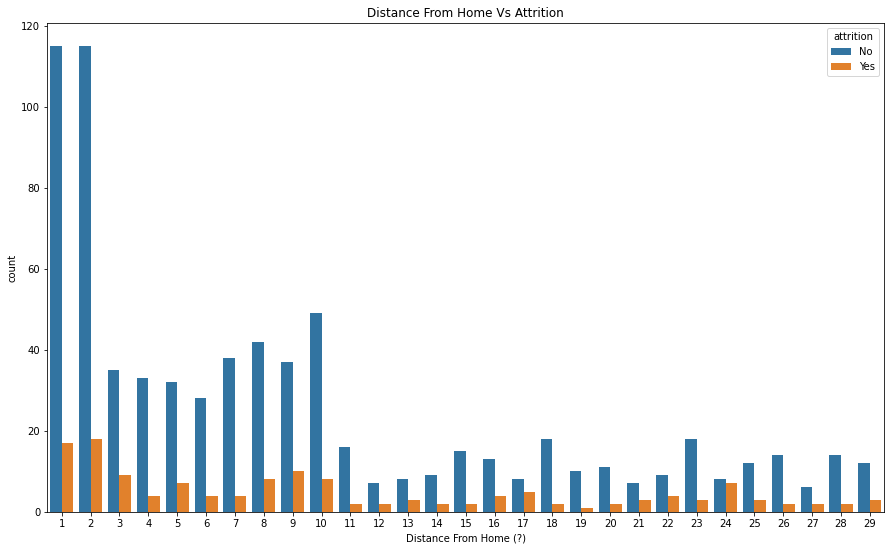

In [40]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.distancefromhome, hue= 'attrition', data = train)
plt.title('Distance From Home Vs Attrition')
plt.xlabel('Distance From Home (?)')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

## Oddly enough those who live the closest seem to leave the company more often, but once again like most of the other observations the ratio of attrition to retained is smaller for those with a value of 1 and 2 than any other distance due to those two values having the most amount of employees within that range

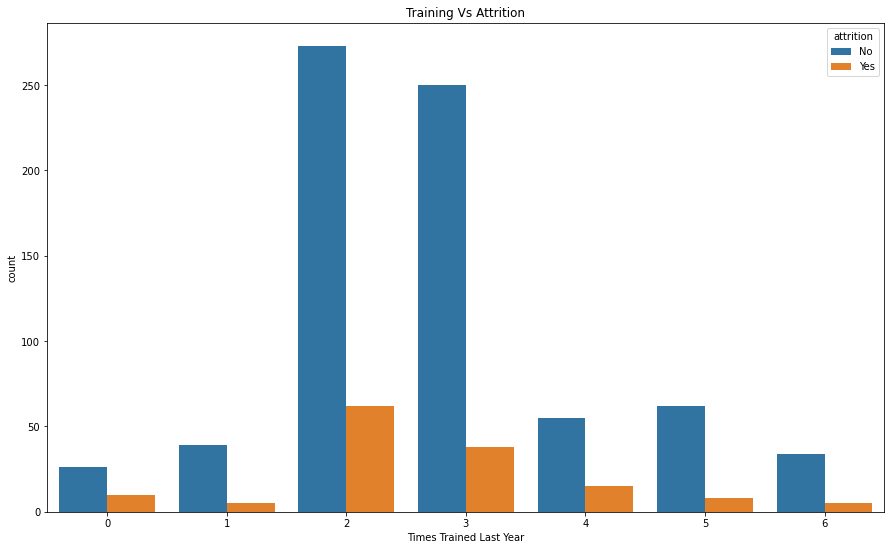

In [41]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.trainingtimeslastyear, hue= 'attrition', data = train)
plt.title('Training Vs Attrition')
plt.xlabel('Times Trained Last Year')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

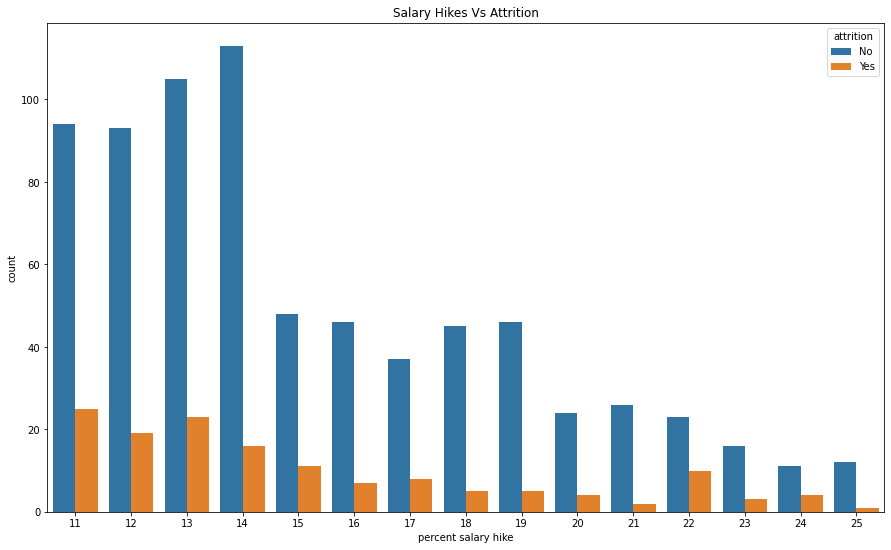

In [42]:
plt.figure(figsize =(15, 9))
sns.countplot(x = train.percentsalaryhike, hue= 'attrition', data = train)
plt.title('Salary Hikes Vs Attrition')
plt.xlabel('percent salary hike')
# plt.legend(labels =['Attrition', 'Retained'])
plt.show()

In [43]:
train.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [44]:
X_train = train.drop(columns=(['attrition', 'gender', 'yearswithcurrmanager']))
y_train = train.attrition
X_validate = validate.drop(columns=(['attrition', 'gender', 'dailyrate','businesstravel', 'distancefromhome', 'education', 'employeenumber',\
                               'hourlyrate', 'jobinvolvement', 'jobrole', 'jobsatisfaction', 'monthlyrate', 'overtime', 'relationshipsatisfaction',\
                              'worklifebalance', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']))
y_validate = validate.attrition
X_test = test.drop(columns=(['attrition', 'gender', 'dailyrate','businesstravel', 'distancefromhome', 'education', 'employeenumber',\
                               'hourlyrate', 'jobinvolvement', 'jobrole', 'jobsatisfaction', 'monthlyrate', 'overtime', 'relationshipsatisfaction',\
                              'worklifebalance', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']))
y_test = test.attrition

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 331 to 111
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      882 non-null    int64
 1   department               882 non-null    int64
 2   educationfield           882 non-null    int64
 3   environmentsatisfaction  882 non-null    int64
 4   joblevel                 882 non-null    int64
 5   maritalstatus            882 non-null    int64
 6   monthlyincome            882 non-null    int64
 7   numcompaniesworked       882 non-null    int64
 8   percentsalaryhike        882 non-null    int64
 9   performancerating        882 non-null    int64
 10  stockoptionlevel         882 non-null    int64
 11  totalworkingyears        882 non-null    int64
 12  trainingtimeslastyear    882 non-null    int64
 13  yearsatcompany           882 non-null    int64
dtypes: int64(14)
memory usage: 103.4 KB


In [46]:
X_train

,age,department,educationfield,environmentsatisfaction,joblevel,maritalstatus,monthlyincome,numcompaniesworked,percentsalaryhike,performancerating,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany
331,27,1,3,3,2,2,6349,0,13,3,1,6,0,5
70,59,1,1,1,2,1,5473,7,11,3,0,20,2,4
998,26,0,2,1,1,1,3904,0,12,3,0,5,2,4
999,42,2,5,3,4,2,16799,0,14,3,1,21,5,20
1087,34,1,4,2,1,2,2308,0,25,4,1,12,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,29,0,1,3,1,2,2700,1,24,4,1,10,3,10
184,53,0,2,4,2,0,4450,1,11,3,2,5,3,4
1274,31,1,3,1,2,2,5468,1,14,3,2,13,3,12
878,42,2,2,4,2,2,6272,7,16,3,1,10,3,4


In [47]:
y_train

331      No
70       No
998      No
999      No
1087     No
       ... 
594      No
184      No
1274     No
878      No
111     Yes
Name: attrition, Length: 882, dtype: object

In [48]:
print(f"The baseline accuracy for retained employees in all cases within the hr_analytics dataset is {(y_train == 'No').mean():.2}")

The baseline accuracy for retained employees in all cases within the hr_analytics dataset is 0.84


## Decision Tree Model

In [49]:
for i in range (5, 16, 5):
    clf = DecisionTreeClassifier(max_depth= i, random_state=123)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))

Tree with max depth of 5
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.888344    0.776119  0.879819    0.832231      0.870148
recall       0.979702    0.363636  0.879819    0.671669      0.879819
f1-score     0.931789    0.495238  0.879819    0.713514      0.861010
support    739.000000  143.000000  0.879819  882.000000    882.000000
Tree with max depth of 10
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.971014    0.983740  0.972789    0.977377      0.973078
recall       0.997294    0.846154  0.972789    0.921724      0.972789
f1-score     0.983979    0.909774  0.972789    0.946877      0.971948
support    739.000000  143.000000  0.972789  882.000000    882.000000
Tree with max depth of 15
              No    Yes  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0  

In [50]:
for i in range (5, 16, 5):
    clf = DecisionTreeClassifier(max_depth= i, random_state=123)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validate)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

Tree with max depth of 5
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.852518   0.375000  0.826531    0.613759      0.776180
recall       0.959514   0.127660  0.826531    0.543587      0.826531
f1-score     0.902857   0.190476  0.826531    0.546667      0.788973
support    247.000000  47.000000  0.826531  294.000000    294.000000
Tree with max depth of 10
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.873518   0.365854  0.802721    0.619686      0.792361
recall       0.894737   0.319149  0.802721    0.606943      0.802721
f1-score     0.884000   0.340909  0.802721    0.612455      0.797179
support    247.000000  47.000000  0.802721  294.000000    294.000000
Tree with max depth of 15
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.871486   0.333333  0.789116    0.602410      0.785455
recall       0.878543   0.319149  0.789116    0.598846      0.789116
f1-score     0.875000   0.

In [51]:
# After finding the best model using decision tree methodology I compared the train set's accuracy score with the 
# validate set's accuracy score to determine the level of consistency between trained data and untrained data.
clf = DecisionTreeClassifier(max_depth=5, random_state=123)
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train) - clf.score(X_validate, y_validate)

0.053287981859410416

### Decision Tree has performed worst than baseline

## Logistic Regression Model Creation

In [55]:
# Utilizing my established features within the X_train variable and my target with y_train, I created a logistic
# regression model to best predict churn rate.  
logit = LogisticRegression(random_state=123)
logit = logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print()
print(pd.DataFrame(classification_report(y_validate, logit.predict(X_validate), output_dict=True)))

                   No         Yes  accuracy   macro avg  weighted avg
precision    0.845800    0.692308  0.843537    0.769054      0.820914
recall       0.994587    0.062937  0.843537    0.528762      0.843537
f1-score     0.914179    0.115385  0.843537    0.514782      0.784669
support    739.000000  143.000000  0.843537  882.000000    882.000000

                   No        Yes  accuracy   macro avg  weighted avg
precision    0.848276   0.750000  0.846939    0.799138      0.832565
recall       0.995951   0.063830  0.846939    0.529891      0.846939
f1-score     0.916201   0.117647  0.846939    0.516924      0.788541
support    247.000000  47.000000  0.846939  294.000000    294.000000


In [53]:
# Created a new model with a new C value of .1
logit = LogisticRegression(random_state=123, C=.1)
logit = logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print()
print(pd.DataFrame(classification_report(y_validate, logit.predict(X_validate), output_dict=True)))

                   No         Yes  accuracy   macro avg  weighted avg
precision    0.840413    0.363636  0.834467    0.602025      0.763113
recall       0.990528    0.027972  0.834467    0.509250      0.834467
f1-score     0.909317    0.051948  0.834467    0.480632      0.770310
support    739.000000  143.000000  0.834467  882.000000    882.000000

                   No        Yes  accuracy   macro avg  weighted avg
precision    0.850174   0.571429  0.843537    0.710801      0.805613
recall       0.987854   0.085106  0.843537    0.536480      0.843537
f1-score     0.913858   0.148148  0.843537    0.531003      0.791448
support    247.000000  47.000000  0.843537  294.000000    294.000000


In [54]:
# Created a new model with a new C value of .8
logit = LogisticRegression(C=.8)
logit = logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print()
print(pd.DataFrame(classification_report(y_validate, logit.predict(X_validate), output_dict=True)))

                   No         Yes  accuracy   macro avg  weighted avg
precision    0.842890    0.600000  0.840136    0.721445      0.803510
recall       0.994587    0.041958  0.840136    0.518273      0.840136
f1-score     0.912477    0.078431  0.840136    0.495454      0.777252
support    739.000000  143.000000  0.840136  882.000000    882.000000

                   No        Yes  accuracy   macro avg  weighted avg
precision    0.848276   0.750000  0.846939    0.799138      0.832565
recall       0.995951   0.063830  0.846939    0.529891      0.846939
f1-score     0.916201   0.117647  0.846939    0.516924      0.788541
support    247.000000  47.000000  0.846939  294.000000    294.000000


In [56]:
# After finding the best model using logitstic regression methodology I compared the train set's accuracy score 
# with the validate set's accuracy score to determine the level of consistency between trained data and untrained 
# data.
logit.score(X_validate, y_validate)-logit.score(X_train, y_train)

0.003401360544217691

### The best Logistic Regression Model performed slightly better than baseline, but not by a considerable amount.  Its Precision for Yes is the best yet when using a c value of 1.

## Random Forest Model Creation

In [57]:
# Creating multiple Random Forest models utilizing the same chosen features as previous models.  Created a for 
# loop that allows me to look at multiple max depths at once for the train dataset.
for i in range (5, 11):
    rf = RandomForestClassifier(max_depth= i, random_state=123)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))

Tree with max depth of 5
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.871158    0.944444   0.87415    0.907801      0.883040
recall       0.997294    0.237762   0.87415    0.617528      0.874150
f1-score     0.929968    0.379888   0.87415    0.654928      0.840783
support    739.000000  143.000000   0.87415  882.000000    882.000000
Tree with max depth of 6
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.880668    0.977273  0.885488    0.928970      0.896331
recall       0.998647    0.300699  0.885488    0.649673      0.885488
f1-score     0.935954    0.459893  0.885488    0.697924      0.858770
support    739.000000  143.000000  0.885488  882.000000    882.000000
Tree with max depth of 7
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.906748    1.000000  0.913832    0.953374      0.921867
recall       1.000000    0.468531  0.913832    0.734266      0.913832
f1-score     0.

In [58]:
# Created a for loop that allows me to look at multiple max depths at once for the validate dataset.
for i in range (5, 11):
    rf = RandomForestClassifier(max_depth= i, random_state=123)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_validate)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

Tree with max depth of 5
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.847751   0.600000  0.843537    0.723875      0.808144
recall       0.991903   0.063830  0.843537    0.527866      0.843537
f1-score     0.914179   0.115385  0.843537    0.514782      0.786481
support    247.000000  47.000000  0.843537  294.000000    294.000000
Tree with max depth of 6
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.856140   0.666667   0.85034    0.761404      0.825850
recall       0.987854   0.127660   0.85034    0.557757      0.850340
f1-score     0.917293   0.214286   0.85034    0.565789      0.804908
support    247.000000  47.000000   0.85034  294.000000    294.000000
Tree with max depth of 7
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.851590   0.454545  0.836735    0.653068      0.788117
recall       0.975709   0.106383  0.836735    0.541046      0.836735
f1-score     0.909434   0.17

## A max depth of 6 offered the best accuracy in terms of accuracy and preision for Yes.

In [62]:
# After discovering that max depth of 6 was the best Random Forest model, I compared the train dataset's accuracy
# to that of the validate dataset's accuracy
rf = RandomForestClassifier(max_depth=6,random_state=123)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train) - rf.score(X_validate, y_validate)

0.035147392290249435

## KNN Model Creation

In [60]:
for i in range (10, 31, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    print(f'KNeighbors with n_neighbors of {i}')
    print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))

KNeighbors with n_neighbors of 10
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.850000    0.636364  0.844671    0.743182      0.815363
recall       0.989175    0.097902  0.844671    0.543538      0.844671
f1-score     0.914321    0.169697  0.844671    0.542009      0.793594
support    739.000000  143.000000  0.844671  882.000000    882.000000
KNeighbors with n_neighbors of 15
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.853946    0.575758  0.843537    0.714852      0.808843
recall       0.981055    0.132867  0.843537    0.556961      0.843537
f1-score     0.913098    0.215909  0.843537    0.564504      0.800062
support    739.000000  143.000000  0.843537  882.000000    882.000000
KNeighbors with n_neighbors of 20
                   No         Yes  accuracy   macro avg  weighted avg
precision    0.848204    0.631579  0.843537    0.739891      0.813082
recall       0.990528    0.083916  0.843537    0.537222   

In [61]:
for i in range (10, 31, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validate)
    print(f'KNeighbors with n_neighbors of {i}')
    print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

KNeighbors with n_neighbors of 10
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.844291   0.400000  0.836735    0.622145      0.773265
recall       0.987854   0.042553  0.836735    0.515204      0.836735
f1-score     0.910448   0.076923  0.836735    0.493685      0.777197
support    247.000000  47.000000  0.836735  294.000000    294.000000
KNeighbors with n_neighbors of 15
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.844828   0.500000  0.840136    0.672414      0.789702
recall       0.991903   0.042553  0.840136    0.517228      0.840136
f1-score     0.912477   0.078431  0.840136    0.495454      0.779143
support    247.000000  47.000000  0.840136  294.000000    294.000000
KNeighbors with n_neighbors of 20
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.841924   0.333333  0.836735    0.587629      0.760619
recall       0.991903   0.021277  0.836735    0.506590      0.836735
f

In [63]:
knn = KNeighborsClassifier(n_neighbors=15)
knn = knn.fit(X_train, y_train)
knn.score(X_train, y_train) - knn.score(X_validate, y_validate)

0.003401360544217691

### One of the better accuracy differences between the train set and validation set but still barely beating baseline accuracy and very low precision scores for Yes

## MVP Model Creation Takeaways
- Decision Tree model max depth of 5 (.05 variation between train and val).  Did not beat baseline.
- Logistic Regression model c value of 1 (.003 variation). Best precision score.  Barely beat baseline.
- Random Forest model max depth of 6 (.04 variation). Best accuracy score, but its precision score has a decent amount a variation between the train set and the validation set.
- K-Nearest Neighbor model n_neighbors of 15 (.003 variation). Bad precision score.  Barely beat baseline.

- I discovered that the best model overall was that of the Logistic Regression model due to it having the best precision while still outperforming baseline even though it was a very low improvement from baseline.  Out of all of the models, Logistic Regression was able to predict attrition accurately 75% of the time

In [64]:
print(pd.DataFrame(classification_report(y_test, logit.predict(X_test), output_dict=True)))

                   No        Yes  accuracy   macro avg  weighted avg
precision    0.847222   0.500000  0.840136    0.673611      0.791714
recall       0.987854   0.063830  0.840136    0.525842      0.840136
f1-score     0.912150   0.113208  0.840136    0.512679      0.784428
support    247.000000  47.000000  0.840136  294.000000    294.000000


In [66]:
proba_test = logit.predict_proba(X_test)

In [67]:
proba_df = pd.DataFrame(proba_test, columns = logit.classes_.tolist())
proba_df.head()

,No,Yes
0,0.631404,0.368596
1,0.896788,0.103212
2,0.933451,0.066549
3,0.824173,0.175827
4,0.807177,0.192823


In [68]:
test_df = X_test.reset_index()
test_df.head()

,index,age,department,educationfield,environmentsatisfaction,joblevel,maritalstatus,monthlyincome,numcompaniesworked,percentsalaryhike,performancerating,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany
0,1435,44,0,2,2,1,1,2436,6,12,3,0,6,2,4
1,680,36,0,0,2,1,1,4678,2,18,3,0,8,6,6
2,129,49,0,2,3,2,2,6567,1,14,3,0,16,2,15
3,10,35,0,2,1,1,2,2426,0,13,3,1,6,5,5
4,1017,27,0,1,2,1,2,2099,0,14,3,0,6,3,5


In [69]:
predictions = pd.concat([test_df, proba_df], axis=1)
predictions.head()

,index,age,department,educationfield,environmentsatisfaction,joblevel,maritalstatus,monthlyincome,numcompaniesworked,percentsalaryhike,performancerating,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,No,Yes
0,1435,44,0,2,2,1,1,2436,6,12,3,0,6,2,4,0.631404,0.368596
1,680,36,0,0,2,1,1,4678,2,18,3,0,8,6,6,0.896788,0.103212
2,129,49,0,2,3,2,2,6567,1,14,3,0,16,2,15,0.933451,0.066549
3,10,35,0,2,1,1,2,2426,0,13,3,1,6,5,5,0.824173,0.175827
4,1017,27,0,1,2,1,2,2099,0,14,3,0,6,3,5,0.807177,0.192823


In [70]:
predictions['predicted'] = logit.predict(X_test)

In [71]:
csv_churn = predictions[['index', 'No', 'Yes', 'predicted']]
csv_churn.head()

,index,No,Yes,predicted
0,1435,0.631404,0.368596,No
1,680,0.896788,0.103212,No
2,129,0.933451,0.066549,No
3,10,0.824173,0.175827,No
4,1017,0.807177,0.192823,No


In [72]:
# Saved my csv file to my directory
csv_churn.to_csv('predictions.csv')

# Conclusions and Recommendations

1. Utilizing the features that showed distinct influence on our target variable ('attrition') allowed for a decent mvp model with lack of detailed information and a small dataset compared to most.

2. My recommendations are that the company focuses on employees that are new to the workforce and are new to the company and are between the ages 25-36.  These are the individuals who have high attrition rates for whatever reason.

3. Next steps at this company are to find out why younger employees new to the workforce and/or to the company are deciding to the leave the company.  Much of the other categories that were given didn't give great insight into a distinct shift in attrition rate and even more so a lot of the categories didn't have great descriptions to start off with.  I would probably send out questionnaires or do 1v1 interviews with a sample population of the aforementioned target groups.
